# LD Lib. Python Tutorial 2 - Libraries

## Python Libraries for Finance for Beginners

[Python](https://www.python.org/doc/essays/blurb/) is an interpreted, object-oriented, high-level programming language with dynamic semantics. In order to be run on any one machine, it first has to be installed; you can download it [here](https://www.python.org/downloads/). For more info on Python, I'd strongly suggest watching [this YouTube video series](https://pythonprogramming.net/python-fundamental-tutorials/).

### IDEs

You may know a coding language like Python, but you need a medium through which you can send this code to the machine you want to run your code on, that medium is called an [Integrated Development Environment (IDE)](https://aws.amazon.com/what-is/ide/#:~:text=An%20integrated%20development%20environment%20(IDE,easy%2Dto%2Duse%20application.)). There are many out there, such as [VSCode](https://code.visualstudio.com/download); but I will use [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html), as it allows us to use Notebooks in which we write code 'cells' and text 'cells' next to each other, helping me explain what happens in each code cell. (FYI (For Your Information): I do not use [Anaconda](https://www.anaconda.com/), but you may chose to, it's up to you.)

### Libraries

We mentioned, in Tutorial 1, a few interesting Python [Libraries](https://stackoverflow.com/questions/18474784/what-exactly-is-a-python-library); let's dig deeped into the most useful ones:

### Pandas

Pandas might be your best friend in Python. This dataframe manipulation enabler is simply brilliant. We touched on it very quickly in the previous Tutorial:

In [1]:
# pip install pandas
import pandas
pandas.read_csv("data.csv")

Empty DataFrame
Columns: [1, 20, 30]
Index: []

Here, I imported a data-frame from my excel document named 'data.csv' that I put in the same location on my machine where I am runing this current Notebook. There was only 3 numbers in that data-frame, `1`, `20`, & `30`. One could create such a pandas dataframe (let's name it `df`) with the `pandas.DataFrame` function too:

In [2]:
df1 = pandas.DataFrame(
    data={'col1': [1, 2], 'col2': [3, 4]})
df1

col1  col2
0     1     3
1     2     4

You may also want to abreviate the library name so that you don't have to write `pandas` every time:

In [3]:
import pandas as pd
df2 = pd.DataFrame(
    data={'col1': [5, 6], 'col2': [7, 8]})
df2

col1  col2
0     5     7
1     6     8

Let's dig deeper into Pandas:

In [4]:
# Index: Rows, in Pandas, are called index:
df2.index

RangeIndex(start=0, stop=2, step=1)

In [5]:
# You can have values other than int as index:
df2.index = ['Index A', 'Index B']
df2.index

Index(['Index A', 'Index B'], dtype='object')

In [6]:
df2

col1  col2
Index A     5     7
Index B     6     8

In [7]:
# Columns:
df2.columns = ['Column A', 'Column B']
df2.columns

Index(['Column A', 'Column B'], dtype='object')

In [8]:
df2

Column A  Column B
Index A         5         7
Index B         6         8

In [9]:
# Append: You can append dataframes together:
df3 = df1.append(df2)
df3

C:\Users\U6082174\AppData\Local\Temp\ipykernel_28388\121870022.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


col1  col2  Column A  Column B
0         1.0   3.0       NaN       NaN
1         2.0   4.0       NaN       NaN
Index A   NaN   NaN       5.0       7.0
Index B   NaN   NaN       6.0       8.0

In [10]:
df4 = pd.DataFrame(
    data={'col1': [15, 16], 'col2': [17, 18]})
df4

col1  col2
0    15    17
1    16    18

In [11]:
df5 = df1.append(df4)
df5

C:\Users\U6082174\AppData\Local\Temp\ipykernel_28388\2622833068.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df1.append(df4)


col1  col2
0     1     3
1     2     4
0    15    17
1    16    18

In [12]:
df5.loc[0]

col1  col2
0     1     3
0    15    17

In [13]:
df6 = pd.DataFrame(
    data={'col3': [21, 22], 'col4': [23, 24]})
df6

col3  col4
0    21    23
1    22    24

In [14]:
df7 = df2.merge(df6, on=df2.index)
df7

key_0  Column A  Column B  col3  col4
0  Index A         5         7    21    23
1  Index B         6         8    22    24

In [15]:
df1

col1  col2
0     1     3
1     2     4

In [16]:
df8 = df1.merge(df6)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [17]:
df8 = df1.merge(df6, left_index=True, right_index=True)
df8

col1  col2  col3  col4
0     1     3    21    23
1     2     4    22    24

In [18]:
# Join
df9 = df1.join(df6)
df9

col1  col2  col3  col4
0     1     3    21    23
1     2     4    22    24

In [19]:
# Sum
df9.loc[0].sum() # Note that this is the sum of the row `0`

48

In [20]:
# Average
df9['col4'].mean() # Note that this is the sum of the column `'col4'`

23.5

In [21]:
# # Merge
# Note that we're adding strings as data in out dataframe, which is perfectly acceptable
df10 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})
print("df10:")
display(df10)

df11 = pd.DataFrame({'key': ['K0', 'K1', 'K3'],
                    'C': ['C0', 'C1', 'C3'],
                    'D': ['D0', 'D1', 'D3']})
print("df11:")
display(df11)

df12 = df10.merge(df11, how='inner', on='key')

print("df12:")
df12

df10:


key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2

df11:


key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K3  C3  D3

df12:


key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1

More on Pandas Joins [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html).

In [22]:
# Transpose
df13 = df8.T
df13

0   1
col1   1   2
col2   3   4
col3  21  22
col4  23  24

In [23]:
# Shift
df13['shift'] = df13[0].shift(-1)
df13 # Notice that it returns floats, not int's

0   1  shift
col1   1   2    3.0
col2   3   4   21.0
col3  21  22   23.0
col4  23  24    NaN

In [24]:
# # Filter:

# Let's get only Columns A & B:
df12[['A', 'B']]

A   B
0  A0  B0
1  A1  B1

In [25]:
# Let's get only Row 0 (note that it's 0-indexed):
df12.iloc[0]

key    K0
A      A0
B      B0
C      C0
D      D0
Name: 0, dtype: object

In [26]:
# Let's get only data containing `A` or `0`:
df12[
    df12.apply(
        lambda row: row.astype(str).str.contains('A').any() or row.astype(str).str.contains('0').any(),
        axis=1)]

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1

We've gone up in difficulty quite a lot there, so let's stop and take it on as it goes, but I wanted to show  you how malleable Pandas is, and why it is so popular.

### Numpy & Scipy

Another interesting and prolific library is [Numpy](https://numpy.org/). It's used a lot for mathematical transformation, e.g.: the Black Scholes Mortensen option model. We will need [Scipy](https://scipy.org/) for statistical methods too:

In [27]:
import numpy as np
from scipy.stats import norm # Here we import the module `norm` from the module `stats` of the Library `scipy`

def black_scholes(S, K, T, r, sigma):
    """
    Parameters
    -----------------------------------------------
    Inputs:
        S: initial stock price
        K: strike price
        T: time to maturity
        r: risk-free rate
        sigma: volatility

    Output/Returns:
        - tuple[float]: A tuple of two float objects of the values of the Call and Put options as per the BSM model.
    """

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    # Below we use the function `cdf` from the module `norm`
    call = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    put = (K * np.exp(-r * T) * norm.cdf(-d2, 0.0, 1.0) - S * norm.cdf(-d1, 0.0, 1.0))

    return call, put

call_price, put_price = black_scholes(
    S=100, K=105, T=1.0, r=0.05, sigma=0.2)  # dummy data for presentation

print("Call Price: ", call_price)
print(f"Put Price: {put_price}")

Call Price:  8.021352235143176
Put Price: 7.9004418077181455


### Matplotlib

Another interesting and popular library is [Matplotlib](https://matplotlib.org/) with which we can make simple graphs:

In [28]:
lst_S = [100 + i for i in range(0, 100, 10)]
lst_K = [110 + i for i in range(0, 100, 10)]
lst_T = [1 + i for i in range(10)]
lst_r = [0.04 for i in range(10)]
lst_sigma = [0.2 for i in range(10)]
lst_date = pd.date_range(start='2024-01-01', periods=10, freq='W').tolist()

call_put_dict = {
    'call_pr': [],
    'put_pr': []}

for _S, _K, _T, _r, _sigma in zip(lst_S, lst_K, lst_T, lst_r, lst_sigma):
    call_price, put_price = black_scholes(
        S=_S, K=_K, T=_T, r=_r, sigma=_sigma)
    call_put_dict['call_pr'].append(call_price)
    call_put_dict['put_pr'].append(put_price)

call_put_dict

{'call_pr': [5.658792471546349,
  12.031249683098814,
  18.634587983769123,
  25.556830541991843,
  32.81792646439074,
  40.414730342992,
  48.335095276672874,
  56.563181851184325,
  65.08175135670196,
  73.8732503055133],
 'put_pr': [11.345630778301903,
  12.805211249495116,
  13.934244756999597,
  14.856960997261439,
  15.627539426088028,
  16.27518811364056,
  16.8183313241462,
  17.2700085244487,
  17.640253310197863,
  17.937259512641184]}

<Axes: >

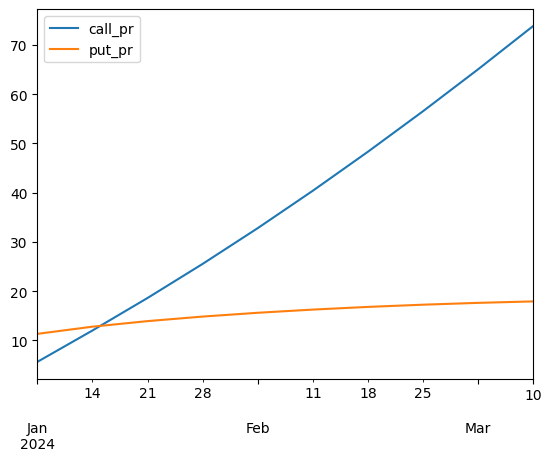

In [29]:
pd.DataFrame(data=call_put_dict, index=lst_date).plot()

You can find out more about Matplotlib in [this article](https://developers.lseg.com/en/article-catalog/article/estimating-monthly-gdp-figures-via-an-income-approach).

There are many more libraries, the above is only a small selection of the most used ones in finance.